### 4. Modeling 
We try 10 wildly used regression model to train with our data, using GridSearch to optimize the parameters. Comparing single model with stacking models, we choose the best model to do prediction. Furthermore, we fine-turn the prediction values manually.

#### Loading data

In [112]:
import pandas as pd
import numpy as np

In [113]:
X=pd.read_csv("X_drop.csv")
test=pd.read_csv("testing_features.csv")

In [120]:
train = pd.read_csv("train_drop.csv")
train.drop(['Id'], axis=1, inplace=True)
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice.reset_index(drop=True)

In [121]:
X.shape

(1424, 76)

In [122]:
test.shape

(1459, 76)

In [123]:
y.shape

(1424,)

In [124]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Tranformation of data

In [125]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [126]:
all_data = pd.concat([X, test]).reset_index(drop=True)

In [127]:
features_num = all_data.select_dtypes(include=[np.number])
features_cat = all_data.select_dtypes(exclude=[np.number])
num_features = list(features_num)
cat_features = list(features_cat)

CT=ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])
all_data_prepared = CT.fit_transform(all_data)

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [128]:
X_train = all_data_prepared[:len(y)]
X_train.shape

(1424, 280)

In [129]:
X_test = all_data_prepared[len(y):]
X_test.shape

(1459, 280)

#### Train 10 different models with GridSearch

In [130]:
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [131]:
linreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(linreg, parameters, cv=5, scoring = 'neg_mean_squared_error')
grid_linear_result=grid_linear.fit(X_train, y)
linreg_score=np.sqrt(-cross_val_score(grid_linear, X_train, y)).mean()
print(linreg_score)

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.10058931672872769


In [132]:
best_params = grid_linear_result.best_params_
print("Best parameters: %s " % (best_params))

Best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True} 


In [133]:
ridge = Ridge()
parameters = {'alpha':np.arange(10,15,1), 'normalize':[True,False], 'fit_intercept':[True,False]}
grid_ridge = GridSearchCV(ridge, parameters, cv=5, scoring = 'neg_mean_squared_error')
grid_ridge_result=grid_ridge.fit(X_train, y)
ridge_score=np.sqrt(-cross_val_score(grid_ridge, X_train, y)).mean()
print(ridge_score)

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.09070508125687134


In [134]:
best_params = grid_ridge_result.best_params_
print("Best parameters: %s " % (best_params))

Best parameters: {'alpha': 14, 'fit_intercept': True, 'normalize': False} 


In [135]:
lasso = linear_model.Lasso()
parameters = {'alpha':[0.0001, 0.001],'normalize':[True,False], 'fit_intercept':[True,False]}
grid_lasso = GridSearchCV(lasso, parameters, cv=5, scoring = 'neg_mean_squared_error')
grid_lasso_result=grid_lasso.fit(X_train, y)
lasso_score=np.sqrt(-cross_val_score(grid_lasso, X_train, y)).mean()
print(lasso_score)

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

0.08907685116453394


/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [136]:
best_params = grid_lasso_result.best_params_
print("Best parameters: %s " % (best_params))

Best parameters: {'alpha': 0.0001, 'fit_intercept': True, 'normalize': True} 


In [137]:
enet = ElasticNet()
parameters = {'alpha': np.arange(1e-4,1e-3,1e-4),
              'l1_ratio': np.arange(0.1,1.0,0.1)}
grid_enet = GridSearchCV(enet, parameters, cv=5, scoring = 'neg_mean_squared_error')
grid_enet_result=grid_enet.fit(X_train, y)
enet_score=np.sqrt(-cross_val_score(grid_enet, X_train, y)).mean()
print(enet_score)

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not conv

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

0.09030722870882547


In [138]:
best_params = grid_enet_result.best_params_
print("Best parameters: %s " % (best_params))

Best parameters: {'alpha': 0.0005, 'l1_ratio': 0.8} 


In [139]:
gbr= GradientBoostingRegressor()
param_grid = {'n_estimators':np.arange(100,500,100),
              'max_depth':np.arange(1,5,1)}
grid_gbr = GridSearchCV(gbr, param_grid, cv=5, scoring = 'neg_mean_squared_error')
grid_gbr_result=grid_gbr.fit(X_train, y)
gbr_score=np.sqrt(-cross_val_score(grid_gbr, X_train, y)).mean()
print(gbr_score)

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.09740153228946731


In [140]:
best_params = grid_gbr_result.best_params_
print("Best parameters: %s " % (best_params))

Best parameters: {'max_depth': 2, 'n_estimators': 400} 


In [141]:
xgbr = XGBRegressor()
param_grid = {'n_estimators':np.arange(100,500,100),
              'max_depth':np.arange(1,5,1)}
grid_xgbr = GridSearchCV(xgbr, param_grid, cv=5, scoring = 'neg_mean_squared_error')
grid_xgbr_result=grid_xgbr.fit(X_train, y)
xgbr_score=np.sqrt(-cross_val_score(grid_xgbr, X_train, y)).mean()
print(xgbr_score)

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.09530352535218965


In [142]:
best_params = grid_xgbr_result.best_params_
print("Best parameters: %s " % (best_params))

Best parameters: {'max_depth': 2, 'n_estimators': 400} 


In [143]:
lsvr = LinearSVR()
param_grid = {'C':np.arange(0.1,1.0,0.1),
             'max_iter':[50000]}
grid_lsvr = GridSearchCV(lsvr, param_grid, cv=5, scoring = 'neg_mean_squared_error')
grid_lsvr_result=grid_lsvr.fit(X_train, y)
lsvr_score=np.sqrt(-cross_val_score(grid_lsvr, X_train, y)).mean()
print(lsvr_score)

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.11513162827287438


In [144]:
best_params = grid_lsvr_result.best_params_
print("Best parameters: %s " % (best_params))

Best parameters: {'C': 0.6, 'max_iter': 50000} 


In [145]:
svr= SVR()
param_grid = {'C':np.arange(1,11,2),
              'kernel':['poly','rbf','sigmoid'],
              'gamma':['auto']}
grid_svr = GridSearchCV(svr, param_grid, cv=5, scoring = 'neg_mean_squared_error')
grid_svr_result=grid_svr.fit(X_train, y)
svr_score=np.sqrt(-cross_val_score(grid_svr, X_train, y)).mean()
print(svr_score)

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.1002917435374779


In [146]:
best_params = grid_svr_result.best_params_
print("Best parameters: %s " % (best_params))

Best parameters: {'C': 3, 'gamma': 'auto', 'kernel': 'rbf'} 


In [148]:
sgd = SGDRegressor()
parameters = {'max_iter' :[10000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True]  }
grid_sgd = GridSearchCV(sgd, parameters, cv=5, scoring = 'neg_mean_squared_error')
grid_sgd_result=grid_sgd.fit(X_train, y)
sgd_score=np.sqrt(-cross_val_score(grid_sgd, X_train, y)).mean()
print(sgd_score)

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have be

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have be

0.11196950459183476


In [149]:
best_params = grid_sgd_result.best_params_
print("Best parameters: %s " % (best_params))

Best parameters: {'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'max_iter': 10000} 


In [150]:
rfr=RandomForestRegressor()
param_grid = {'n_estimators':[100,150,200],
              'max_features':[25,50,75],
              'min_samples_split':[2,4,6]}
grid_rfr = GridSearchCV(rfr, param_grid, cv=5, scoring = 'neg_mean_squared_error')
grid_rfr_result=grid_rfr.fit(X_train, y)
rfr_score=np.sqrt(-cross_val_score(grid_rfr, X_train, y)).mean()
print(rfr_score)

/Users/shaopeng/ml/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.11520763859560627


In [151]:
best_params = grid_rfr_result.best_params_
print("Best parameters: %s " % (best_params))

Best parameters: {'max_features': 75, 'min_samples_split': 2, 'n_estimators': 100} 


#### Comparing the RMSE score of different models

In [152]:
list_scores = [linreg_score, ridge_score, lasso_score, enet_score, sgd_score, rfr_score, gbr_score, xgbr_score, lsvr_score, svr_score]
list_regressors = ['Linear','Ridge','Lasso','ElaNet','SGD','RF','GBR','XGBR','linear SVR', 'SVR']

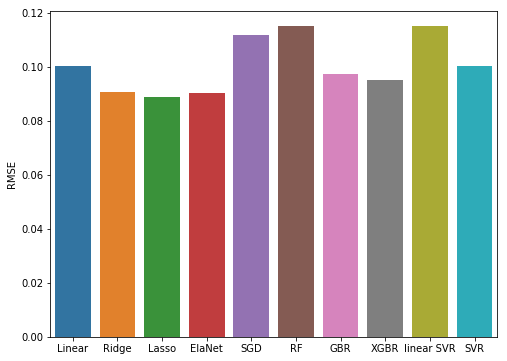

In [153]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list_regressors, y=list_scores)
plt.ylabel('RMSE')
plt.show()

In [154]:
ridge=grid_ridge.best_estimator_
lasso=grid_lasso.best_estimator_
elanet=grid_enet.best_estimator_
xgbr=grid_xgbr.best_estimator_
gbr=grid_gbr.best_estimator_
sgd=grid_sgd.best_estimator_
rf=grid_sgd.best_estimator_
svr=grid_svr.best_estimator_
linreg=grid_linear.best_estimator_
lsvr=grid_lsvr.best_estimator_

#### Using single model to predict
We choose the best model Lasso.

In [159]:
# best model-Lasso    
y_predict1=lasso.predict(X_train)

We draw a scatter plot of y and y predicted with training data. As showed, some smaller values are not regression well, so we manually tune the values by a small ratio.

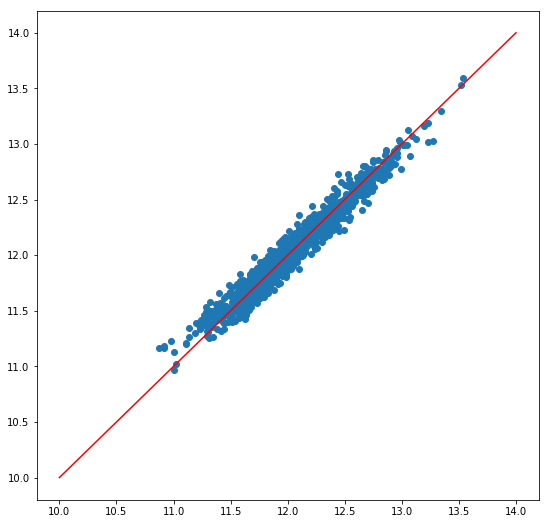

In [160]:
plt.figure(figsize=(9, 9))
plt.scatter(y, y_predict1)
plt.plot(range(10, 15), range(10, 15), color="red")

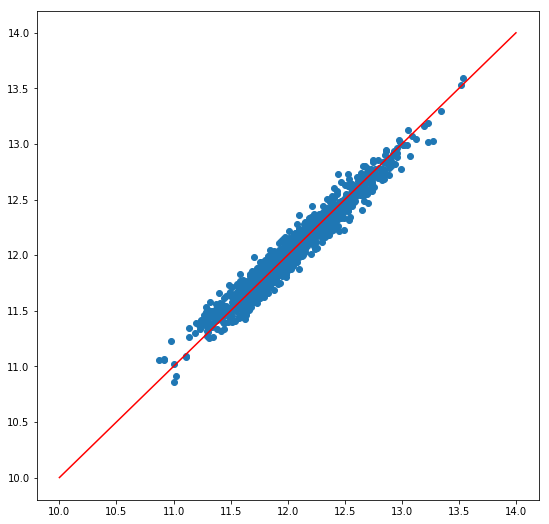

In [162]:
q1 = pd.DataFrame(y_predict1).quantile(0.005)
pre_df = pd.DataFrame(y_predict1)
pre_df["SalePrice"] = y_predict1
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"]*0.99
train_predict = np.array(pre_df.SalePrice)
plt.figure(figsize=(9, 9))
plt.scatter(y, train_predict)
plt.plot(range(10, 15), range(10, 15), color="red")

In [165]:
y_test1=lasso.predict(X_test)

In [172]:
submission=pd.read_csv('datasets/project/sample_submission.csv')
q1 = pd.DataFrame(y_test1).quantile(0.005)
pre_df = pd.DataFrame(y_test1)
pre_df["SalePrice"] = y_test1
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] *0.99
test_predict = np.array(pre_df.SalePrice)
submission["SalePrice"] = np.floor(np.exp(test_predict)-1)
submission.to_csv("y_test1", index=False)
# RMSE score is 0.11933

#### Using best 4 models together

In [177]:
# Using best 4 model together  
y_predict2=0.3*ridge.predict(X_train)+0.3*lasso.predict(X_train)+0.1*gbr.predict(X_train)+0.3*xgbr.predict(X_train)

First, we check the RMSE score with training data. It is abviously improved compareing with only using Lasso model.

In [179]:
y_predict2_mse = mean_squared_error(y, y_predict2)
y_predict2_rmse = np.sqrt(y_predict2_mse)  
print(y_predict2_rmse)

0.0690928120854936


Next, we draw a scatter plot of y and y predicted with training data. It looks good. 

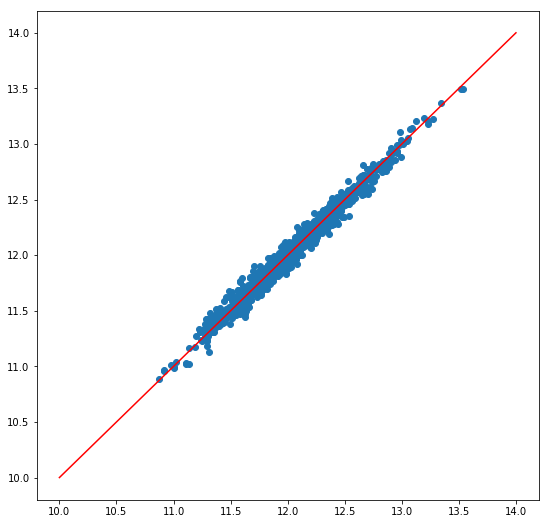

In [180]:
plt.figure(figsize=(9, 9))
plt.scatter(y, y_predict2)
plt.plot(range(10, 15), range(10, 15), color="red")

In [181]:
y_test2=0.3*ridge.predict(X_test)+0.3*lasso.predict(X_test)+0.1*gbr.predict(X_test)+0.3*xgbr.predict(X_test)

In [182]:
submission.iloc[:,1] = np.floor(np.exp(y_test2)-1)
submission.to_csv('y_test2', index=False)
# RMSE score is 0.11860

#### Using best 5 models together

In [183]:
# Using best 5 models together 
y_predict3=0.2*ridge.predict(X_train)+0.2*lasso.predict(X_train)+0.2*gbr.predict(X_train)+0.2*xgbr.predict(X_train)+0.2*elanet.predict(X_train)

In [199]:
y_predict3_mse = mean_squared_error(y, y_predict3)
y_predict3_rmse = np.sqrt(y_predict3_mse)  
print(y_predict3_rmse)

0.0688616961689247


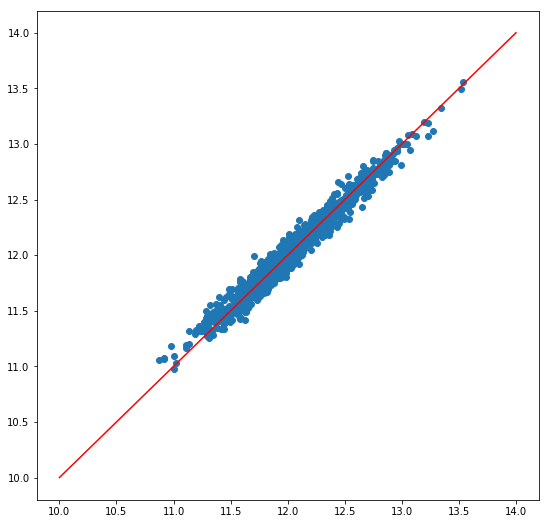

In [200]:
plt.figure(figsize=(9, 9))
plt.scatter(y, y_predict3)
plt.plot(range(10, 15), range(10, 15), color="red")

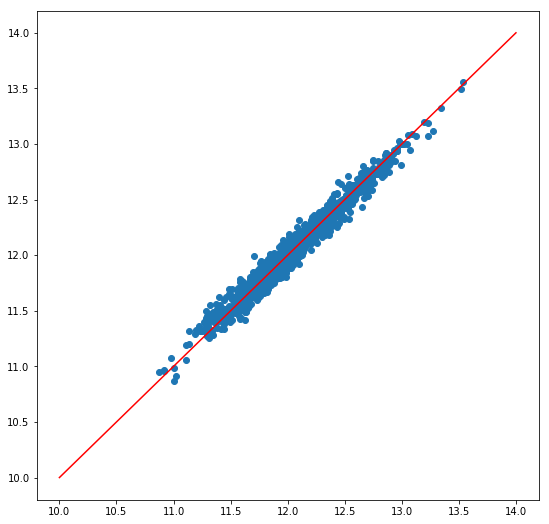

In [204]:
q1 = pd.DataFrame(y_predict3).quantile(0.005)
pre_df = pd.DataFrame(y_predict3)
pre_df["SalePrice"] = y_predict3
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"]*0.99
train_predict = np.array(pre_df.SalePrice)
plt.figure(figsize=(9, 9))
plt.scatter(y, train_predict)
plt.plot(range(10, 15), range(10, 15), color="red")

In [186]:
y_test3=0.2*ridge.predict(X_test)+0.2*lasso.predict(X_test)+0.2*gbr.predict(X_test)+0.2*xgbr.predict(X_test)+0.2*elanet.predict(X_test)

In [207]:
q1 = pd.DataFrame(y_test3).quantile(0.005)
pre_df = pd.DataFrame(y_test3)
pre_df["SalePrice"] = y_test3
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] *0.99
test_predict = np.array(pre_df.SalePrice)
submission["SalePrice"] = np.floor(np.exp(test_predict)-1)
submission.to_csv("y_test3", index=False)
# RMSE score is 0.11783

The RMSE score improved better.

#### Using stacking method

In [194]:
# Stacking method 
from mlxtend.regressor import StackingCVRegressor
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elanet, 
                                            xgbr, gbr), 
                               meta_regressor=xgbr,
                               use_features_in_secondary=True)
stack_gen_model = stack_gen.fit(X_train.toarray(), np.array(y))
y_predict4=stack_gen_model.predict(X_train.toarray())

In [195]:
y_predict4_mse = mean_squared_error(y, y_predict4)
y_predict4_rmse = np.sqrt(y_predict4_mse)  
print(y_predict4_rmse)

0.05627793848441333


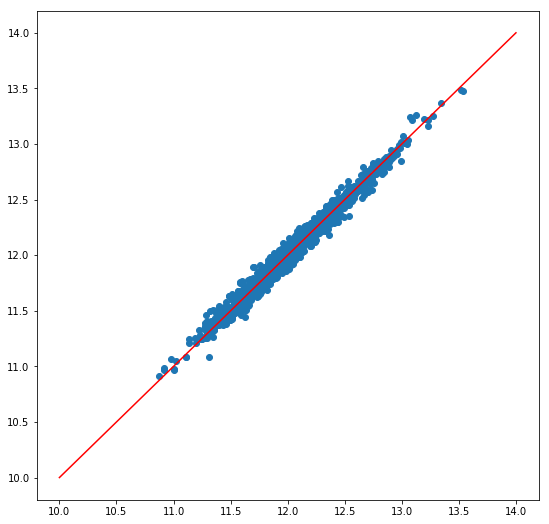

In [196]:
plt.figure(figsize=(9, 9))
plt.scatter(y, y_predict4)
plt.plot(range(10, 15), range(10, 15), color="red")

In [197]:
y_test4=stack_gen_model.predict(X_test.toarray())

In [198]:
submission.iloc[:,1] = np.floor(np.exp(y_test4)-1)
submission.to_csv('y_test4', index=False)
# RMSE score is 0.11833

Not better than 5 models combinations. 
Much more parameters and ratios are test. The best one is used above.